# 기계학습및실습 2024년 1학기 중간과제 1
## 타이타닉 데이터셋 분석 
  인공지능융합학부 김재하 2022101472

### Table of Contents in this notebook 

* [Chapter 1](#chapter1) 타이타닉 데이터 문제 정의
    * [Section 1.1](#section_1_1) 데이터 살펴보기   
    * [Section 1.2](sSection_1_2) 결측치 파악
    * [Section 1.3](sSection_1_3) 데이터 시각화

* [Chapter 2](#chapter2) 데이터 분석
    * [Section 2.1](#section_2_1) 성별(Sex)
    * [Section 2.2](#section_2_2) 동승자 여부(Is Alone)
    * [Section 2.3](#section_2_3) 거주지역 파악(Embarked)
    * [Section 2.4](#section_2_4) 이름(Name)
    * [Section 2.5](#section_2_5) 객실등급(Cabin)
    * [Section 2.6](#section_2_6) Age(나이)
    * [Section 2.7](#section_2_7) 탑승요금(Fare)
    * [Section 2.8](#section_2_8) 데이터 정리
 
* [Chapter 3](#chapter3) 데이터 분류 및 테스트
    * [Section 3.1](#section_3_1) 불필요 데이터 제거
    * [Section 3.2](#section_3_2) 모델 생성  (의사결정나무, 랜덤포레스트, 나이브 베이즈 분류, 서포트 벡터 머신, 로지스틱 회귀 사용)


### Chapter 1 <a class="anchor" id="chapter1"></a>
타이타닉 데이터 분석 및 문제 정의


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Section 1.1 <a class="anchor" id="section_1_1"></a>
데이터 살펴보기

In [2]:
train = pd.read_csv('./data/titanic/train.csv')
test = pd.read_csv('./data/titanic/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Section 1.2 <a class="anchor" id="section_1_2"></a>
 결측치 파악

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Section 1.3 <a class="anchor" id="section_1_3"></a> 
데이터 시각화

In [7]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    
    dead = train[train['Survived']==0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    
    df.index = ['Survived', 'Dead']
    
    df.plot(kind='bar', stacked=True, figsize=(10,5))
#     return df

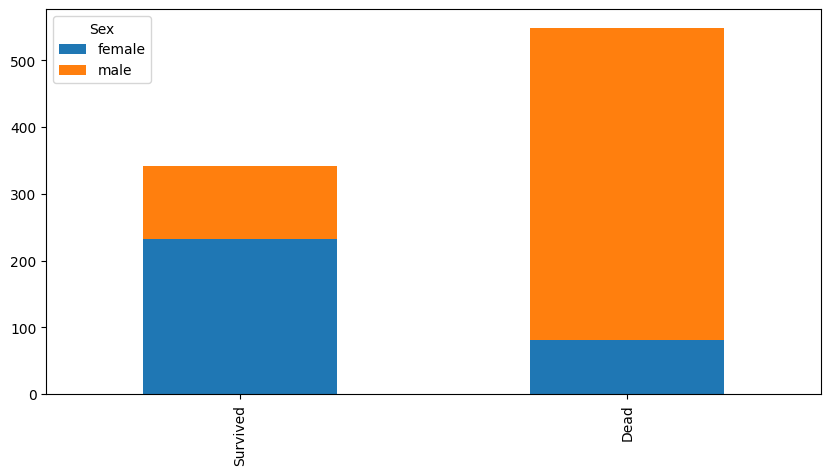

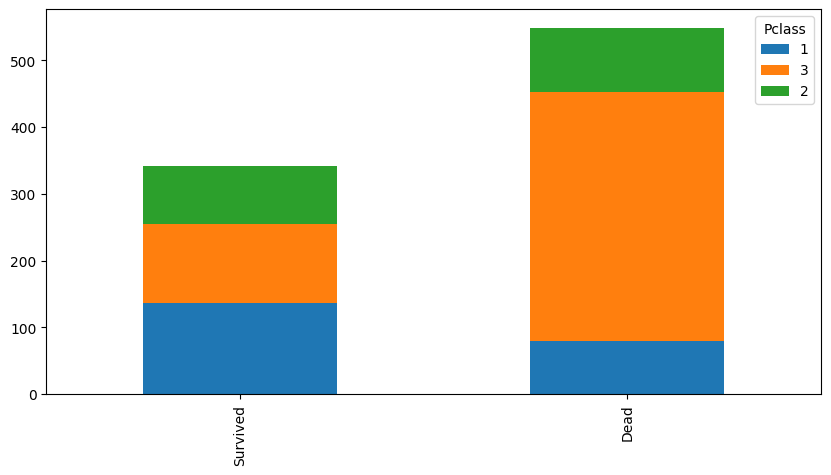

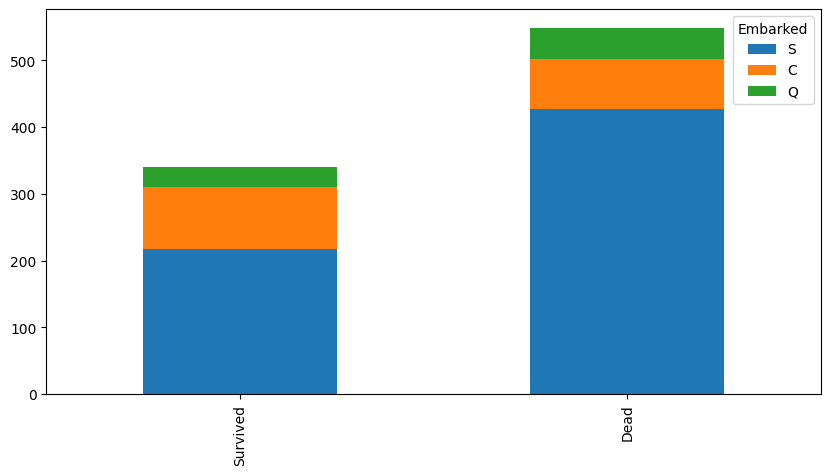

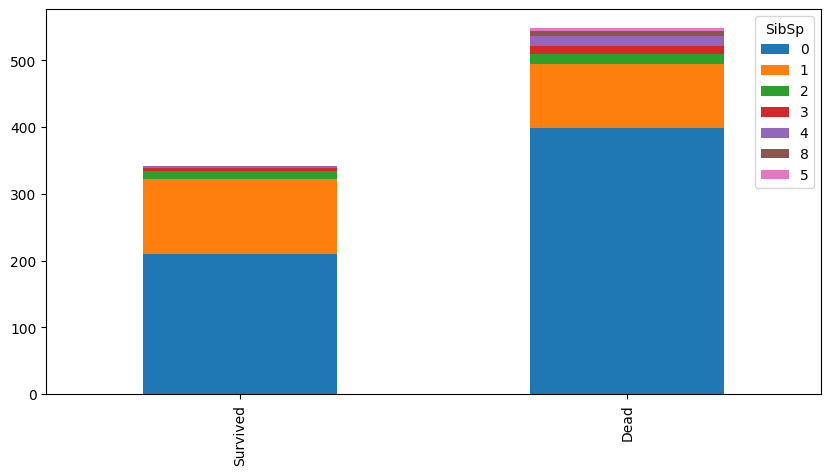

In [8]:
bar_chart('Sex')
bar_chart('Pclass')
bar_chart('Embarked')
bar_chart('SibSp')

#### Section 2 <a class="anchor" id="section_1_2"></a>
데이터 분석

#### Section 2.1 <a class="anchor" id="section_1_2"></a>
성별 (SEX)

In [66]:
train_test_data = [train, test]

sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


#### Section 2.2 <a class="anchor" id="section_1_2"></a>
동승자 여부(Is Alone)

In [70]:
for dataset in train_test_data:
    
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0

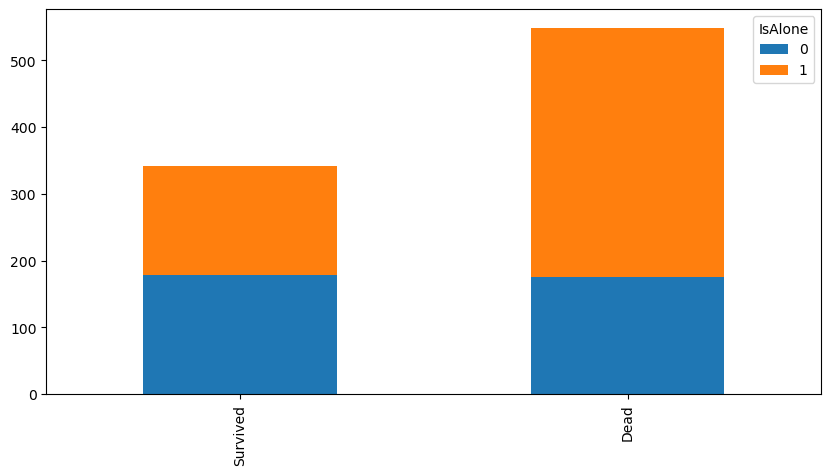

In [72]:
bar_chart('IsAlone')

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,1


#### Section 2.3 <a class="anchor" id="section_1_2"></a>
거주지역 파악(Embarked)

<Axes: >

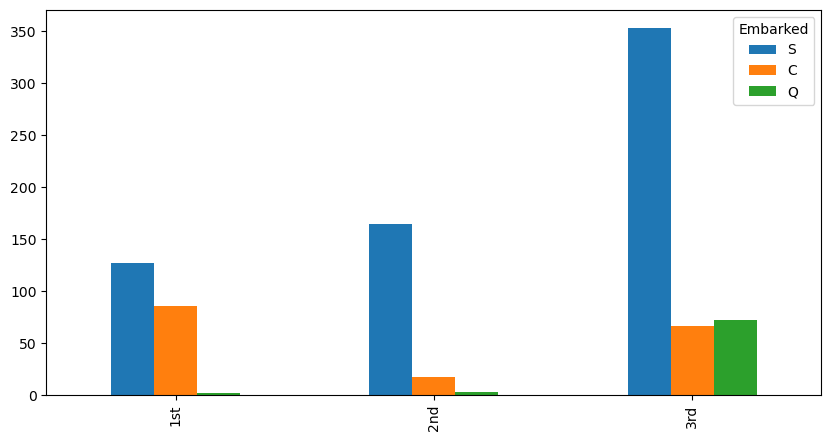

In [76]:
class_list=[]
for i in range(1,4):
    series = train[train['Pclass'] == i]['Embarked'].value_counts()
    class_list.append(series)

df = pd.DataFrame(class_list)
df.index = ['1st', '2nd', '3rd']
df.plot(kind="bar", figsize=(10,5))

In [78]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [80]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1


In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,Mr


#### Section 2.4 <a class="anchor" id="section_1_2"></a>
이름(Name)

In [86]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [88]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [90]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].apply(lambda x: 0 if x=="Mr" else 1 if x=="Miss" else 2 if x=="Mrs" else 3 if x=="Master" else 4)

In [92]:
train['Title'].value_counts()

Title
0    517
1    182
2    125
3     40
4     27
Name: count, dtype: int64

In [94]:
test['Title'].value_counts()

Title
0    240
1     78
2     72
3     21
4      7
Name: count, dtype: int64

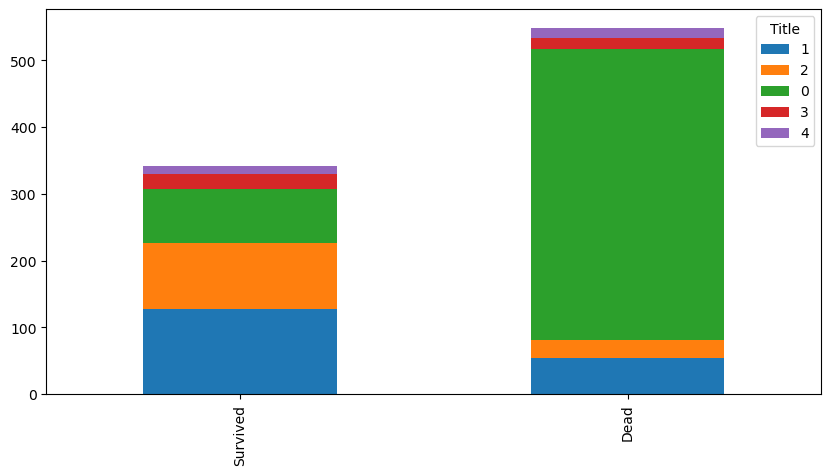

In [96]:
bar_chart('Title')

In [98]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,0


#### Section 2.5<a class="anchor" id="section_1_2"></a>
객실등급(Cabin)

In [100]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [102]:
train['Cabin'] = train['Cabin'].str[:1]

<Axes: >

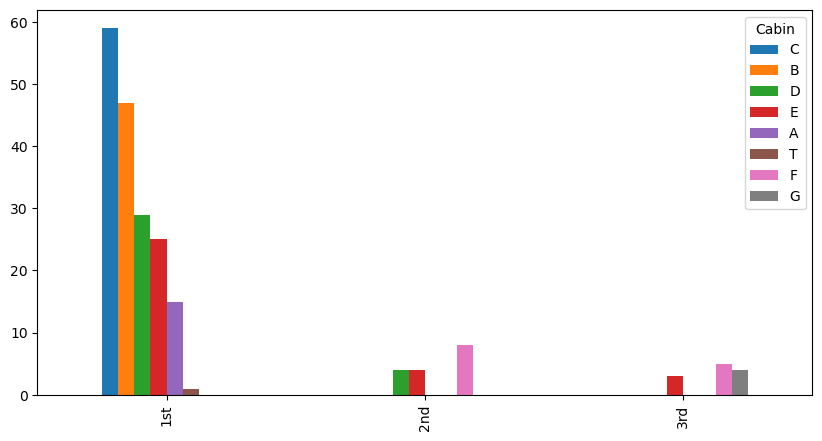

In [104]:
class_list=[]
for i in range(1,4):
    a = train[train['Pclass'] == i]['Cabin'].value_counts()
    class_list.append(a)

df = pd.DataFrame(class_list)
df.index = ['1st', '2nd', '3rd']
df.plot(kind="bar", figsize=(10,5))

#### Section 2.6 <a class="anchor" id="section_1_2"></a>
나이(Age)

In [108]:
dataset['Age'] = dataset['Age'].fillna(dataset.groupby("Title")["Age"].transform("median"))


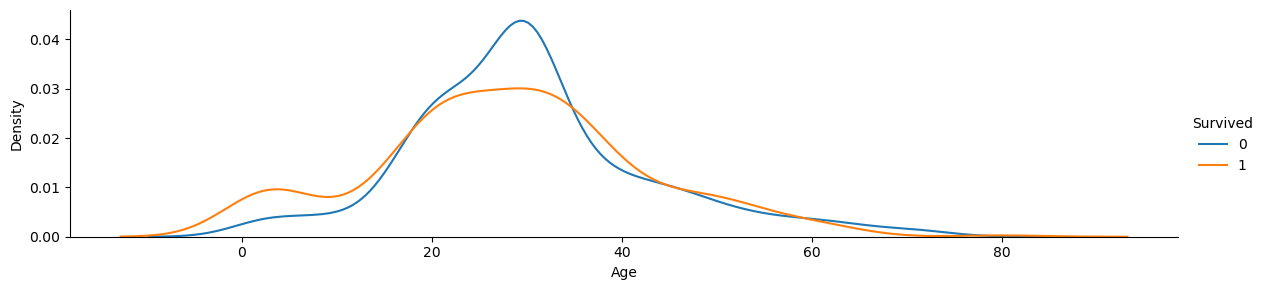

In [110]:
g = sns.FacetGrid(train, hue="Survived", aspect=4)
g = (g.map(sns.kdeplot, "Age").add_legend()) # add_legend()

In [112]:
for dataset in train_test_data:
    dataset['Agebin'] = pd.cut(dataset['Age'], 5, labels=[0,1,2,3,4])

In [114]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,2,0,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,0,2,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,0,2


#### Section 2.7 <a class="anchor" id="section_1_2"></a>
요금(fare)

In [118]:
fare_median_by_class = dataset.groupby("Pclass")["Fare"].transform("median")
dataset["Fare"] = dataset["Fare"].fillna(fare_median_by_class)


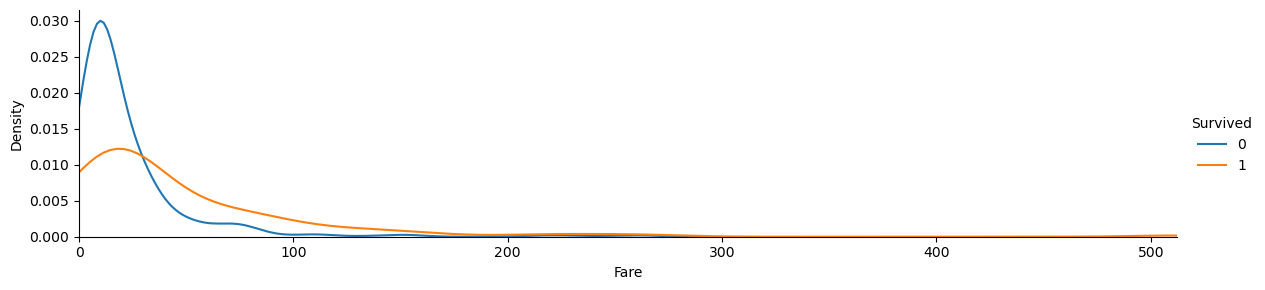

In [120]:
g = sns.FacetGrid(train, hue="Survived", aspect=4)
g = (g.map(sns.kdeplot, "Fare")
     .add_legend() 
     .set(xlim=(0, train['Fare'].max())))

In [126]:
for dataset in train_test_data:
    dataset['Farebin'] = pd.qcut(dataset['Fare'], 4, labels=[0,1,2,3])

In [128]:
pd.qcut(train['Fare'], 4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [130]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Agebin,Farebin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,2,0,2,2,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,0,2,0,2,2,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,0,2,1


#### Section 2.8 <a class="anchor" id="section_1_2"></a>
데이터정리

In [132]:
drop_column = ['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']

for dataset in train_test_data:
    dataset = dataset.drop(drop_column, axis=1, inplace=True)

In [135]:
train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,FamilySize,IsAlone,Title,Agebin,Farebin
0,1,0,3,0,0,2,0,0,1,0
1,2,1,1,1,1,2,0,2,2,3
2,3,1,3,1,0,1,1,1,1,1
3,4,1,1,1,0,2,0,2,2,3
4,5,0,3,0,0,1,1,0,2,1


In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Embarked     891 non-null    int64   
 5   FamilySize   891 non-null    int64   
 6   IsAlone      891 non-null    int64   
 7   Title        891 non-null    int64   
 8   Agebin       891 non-null    category
 9   Farebin      891 non-null    category
dtypes: category(2), int64(8)
memory usage: 58.0 KB


In [139]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Embarked     418 non-null    int64   
 4   FamilySize   418 non-null    int64   
 5   IsAlone      418 non-null    int64   
 6   Title        418 non-null    int64   
 7   Agebin       418 non-null    category
 8   Farebin      418 non-null    category
dtypes: category(2), int64(7)
memory usage: 24.2 KB


#### Section 3 <a class="anchor" id="section_1_2"></a>
데이터 분류 및 테스트


#### Section 3.1 <a class="anchor" id="section_1_2"></a>
불필요 데이터 제거

In [141]:
drop_column2 = ['PassengerId', 'Survived']
train_data = train.drop(drop_column2, axis=1)
target = train['Survived']

#### Section 3.2 <a class="anchor" id="section_1_2"></a>
모델 생성 (의사결정나무, 랜덤포레스트, 나이브 베이즈 분류, 서포트 벡터 머신, 로지스틱 회귀 사용)

In [143]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 

In [144]:
clf = LogisticRegression()
clf.fit(train_data, target)
clf.score(train_data, target)

0.8103254769921436

In [147]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)
clf.score(train_data, target)

0.8900112233445566

In [149]:
clf = RandomForestClassifier()
clf.fit(train_data, target)
clf.score(train_data, target)

0.8900112233445566

In [151]:
clf = GaussianNB()
clf.fit(train_data, target)
clf.score(train_data, target)

0.7968574635241302

In [153]:
clf = SVC()
clf.fit(train_data, target)
clf.score(train_data, target)

0.8338945005611672

In [155]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)
test_data = test.drop("PassengerId", axis=1)
predict = clf.predict(test_data)

In [157]:
submission = pd.DataFrame({
    'PassengerId' : test['PassengerId'],
    'Survived' : predict})

submission.to_csv('submission.csv', index=False)

submission = pd.read_csv("submission.csv")
submission.head()